1. Beskriv kort hur en relationsdatabas fungerar.

Svar:En relationssdatabas är en typ av databas som lagrar och organiserar data i tabeller. Tabellen består av rader och kollumner där varje post represnterar en unik post eller rad och varje kolumn representerar ett specifikt attribut.
 Hur en relationsdatabas fungerar:
 a. Data organiseras i tabeller som kan liknas kalkyblad.
 b. Varje tabell innehåller data om ett specifikt ämne, till exempel produkter eller kunder.
 c.En relationsdatabas är kopplad till genom relationer och relationerna skapas med primärkey. Detta identifierar för varje rad med KundID och Kundtabell.
 d.Relationsdatabaser använder ett språk som kallas SQL (Structured Query Language) för att create, read, update och ta delete data.
 


2. Vad menas med “CRUD”-flödet?

Svar:CRUD är en akronym för Create, Read, Update och Delete, och det representerar de grundläggande operationerna som utförs på data i en relationsdatabas.

Create:Denna operation används för att lägga till ny data i databasen, till exempel att skapa en ny rad i en tabell.
Exempel i SQL:CREATE TABLE ProductsTable(ProductID,ProductName,Price);
INSERT INTO ProductsTable VALUES (1, "Oranges",22). Där vi insert values med id 1, fruit name oranges och price 22.

Read: Denna operation används för att hämta eller läsa data från databasen. Exempel I SQL:
SELECT * FROM ProductsTable; 

Update :
Används för att ändra eller uppdatera befintlig data i databasen.
Exempel i SQL: UPDATE productsTable
               SET Price = 29
                WHERE ProductName= "Annans";
Delete:
Denna operation tar bort data från databasen.
Exempel i SQL:
DELETE FROM ProductTable
WHERE ProductName = "ANNAS";



 3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?

 Svar: 
 Left join: En left join retunerar all rader från vänster tabellen även om det matachar inte rad i den högra tabellen.
 Genom att  använda LEFT JOIN visar det alla poster från den vänster tabellen, Även det matachar inte med den högraa tabellen. 
 Nedan demonnesterar jag en exempel och förklarar hur fungerar:

SELECT TOP 30 A.TransactionID, A.TransactionDate, A.TotalAmount, B.ApprovedToContact
FROM Transactions AS A LEFT JOIN Customers AS B
ON A.CustomerID = B.CustomerID
ORDER BY TotalAmount DESC;

I SQL blir den tabell som anges efter FROM den vänster tabell.

INNER JOIN:
En INNER JOIN retunerar endast de rader där det finns en match i båda tabellerna.
Genom att använda INNER JOIN hämtar data som har genemsamma värden i bådaa tabellerna.

INNER JOIN demonesterar nedan där finns en match i båda tabellerna:

SELECT TOP 10 A.TransactionID, A.TransactionDate, A.TotalAmount, B.StoreName
FROM Transactions AS A
INNER JOIN Stores AS B
ON A.StoreID = B.StoreID
ORDER BY TotalAmount DESC;



 4. Beskriv kort vad indexering i SQL innebär.

 Svar: För att skapa ett index i SQL skriver vi ett Create statement och specificerar att det är ett index vi vill skapa. Vi anger för vilken tabell och vilken kolumn vi skapar indexet.
Nedan demonesterar ett exempel:
 CREATE INDEX idx_FirstName
 ON Customers(FirstName);

 Ett index med namnet "idx_FirstName" skapas med ett CREATE INDEX statement.

 DROP INDEX idx_FirstName
 On Customers;

 Ett Index med namnet idx_FirstName raderas.



 5. Beskriv kort vad en vy i SQL är.
 Svar:
 En VY er en virtuell tabell som defineras av en query. 
 Nedan demonesterar jag en kod förklara:
 CREATE VIEW CustomerSpending
AS
SELECT SUM(A.TotalAmount) AS TotalSpent, 
	B.LastName,
	CASE WHEN SUM(A.TotalAmount)> 2000 THEN 1 
	ELSE 0 END AS Over2000
FROM Transactions AS A
INNER JOIN Customers AS B
ON A.TransactionID = B.CustomerID
GROUP BY B.LastName;

I ovanstående koden  CREATE VIEW användas för att specificeras att det är en ny VY som skapas. VYn tilldelas namnet TotalSpent.



 6. Beskriv kort vad en lagrad procedur i SQL är
 Svar:
 En lagrad procedur är sparad kod som återanvändas. Vi kan centraliserar definitioner med hjälp av lagrade procedurer. För att skapa en lagrad procedurskriver vi ett CREATE statement där vi specifiras att en lagrad procedur skapas.
 Nedan demonesterar jag en kod exempel:
 
 CREATE PROCEDURE GetCustomer
AS
BEGIN 
		SELECT A.CustomerID, A.LastName, B.TotalAmount
		FROM Customers AS A
		INNER JOIN Transactions AS B
		ON A.CustomerID = B.CustomerID
		END;

Denna procedur kan sedan anropas med GetCustomer.


In [104]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)
engine = new_engine('mssql', 'ALAMGIR_RANA', 'AdventureWorks2022', integrated_security=True)
print(type(engine))
connection = engine.connect()
print(type(connection))

mssql://ALAMGIR_RANA/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server
<class 'sqlalchemy.engine.base.Engine'>
<class 'sqlalchemy.engine.base.Connection'>


In [106]:
#Hamta en lista alla tabeller på Databas AdventureWorks 2022
query="""SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE';"""
tables = pd.read_sql(query,engine)
print("Tabeller i AdventureWorks2022:")
print(tables)


Tabeller i AdventureWorks2022:
                 TABLE_NAME
0              SalesTaxRate
1          PersonCreditCard
2               PersonPhone
3            SalesTerritory
4           PhoneNumberType
..                      ...
71                 Location
72                 Password
73  SalesPersonQuotaHistory
74                   Person
75              SalesReason

[76 rows x 1 columns]


In [116]:
# HÄmta antalet anställda per år
query = """SELECT TOP 25 JobTitle, COUNT(*) AS nbr
FROM HumanResources.Employee
GROUP BY JobTitle
ORDER BY nbr DESC
;"""

employee = pd.read_sql(query, engine)

print("Antal Anställda Jobb rollen" ) 
print(employee ) 



Antal Anställda Jobb rollen
                          JobTitle  nbr
0     Production Technician - WC40   26
1     Production Technician - WC50   26
2     Production Technician - WC60   26
3     Production Technician - WC30   25
4     Production Technician - WC20   22
5     Production Technician - WC10   17
6     Production Technician - WC45   15
7             Sales Representative   14
8                            Buyer    9
9             Marketing Specialist    5
10          Application Specialist    4
11                         Janitor    4
12    Quality Assurance Technician    4
13            Scheduling Assistant    4
14             Marketing Assistant    3
15                 Design Engineer    3
16  Accounts Receivable Specialist    3
17    Production Supervisor - WC10    3
18    Production Supervisor - WC20    3
19    Production Supervisor - WC30    3
20    Production Supervisor - WC40    3
21    Production Supervisor - WC45    3
22    Production Supervisor - WC50    3
23    Produc

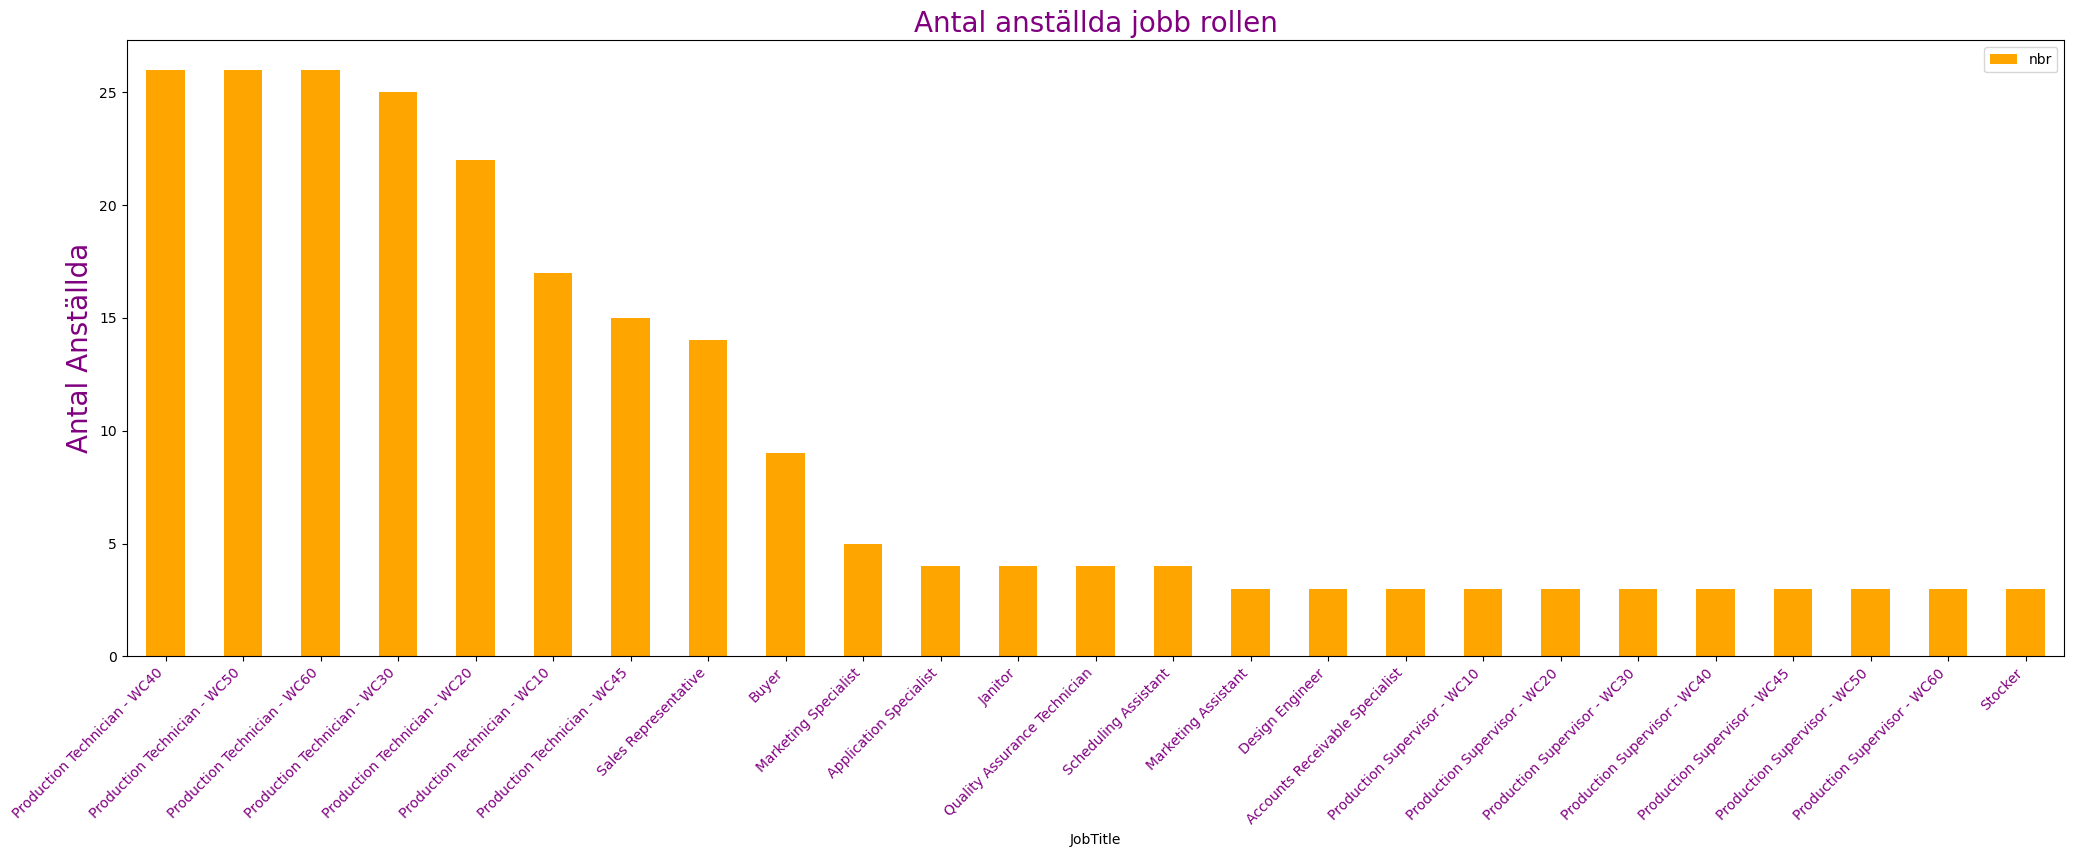

In [113]:
#Visualiserar data


employee.plot(x="JobTitle", y = "nbr", kind="bar", figsize=(25,8), color = "orange",)
plt.title("Antal anställda jobb rollen", color="purple", size="20")
plt.ylabel("Antal Anställda",color="purple", size="20")
plt.xticks(rotation=45, ha="right", color="purple")
plt.show()





In [109]:
# Hämtar antalet försäljning data per år.
query = """SELECT YEAR(OrderDate) AS Year, COUNT(*) AS TotalSales
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY Year;"""
Sales_Data = pd.read_sql(query, engine)
print(Sales_Data)

   Year  TotalSales
0  2011        1607
1  2012        3915
2  2013       14182
3  2014       11761


In [110]:
#Importing Libraries 
import numpy as np
from scipy.stats import t

In [111]:


                # Statistik
#Beräknar Mean and Standard Deviation

Sales_mean = np.mean(Sales_Data)
Sales_std = np.std(Sales_Data, ddof=1)
#Standardavikelse
n = len(Sales_Data)
# Calculate standard error (population standard deviation unknown)
standard_error = Sales_Data / np.sqrt(n)
## Beräknar Konfidence interval använding av t.interval()
Konfidens = 0.95
Alpha =1-Konfidens
df=n-1
t_Kritiska_värde = t.ppf(1 - Alpha / 2, df)
marginal_error = t_Kritiska_värde * (Sales_std / np.sqrt(n))
lower_bound = Sales_mean- marginal_error
upper_bound = Sales_mean + marginal_error



print(f'Medelvärdet av försäljningen per år {Sales_mean}')

print(f'Standard Avikelsen {Sales_std}')

print(f"Confidence Interval: {lower_bound} och {upper_bound}")



Medelvärdet av försäljningen per år 4939.375
Standard Avikelsen Year             1.290994
TotalSales    6051.125591
dtype: float64
Confidence Interval: Year          4937.32074
TotalSales   -4689.31614
dtype: float64 och Year           4941.42926
TotalSales    14568.06614
dtype: float64


c:\Users\alamr\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


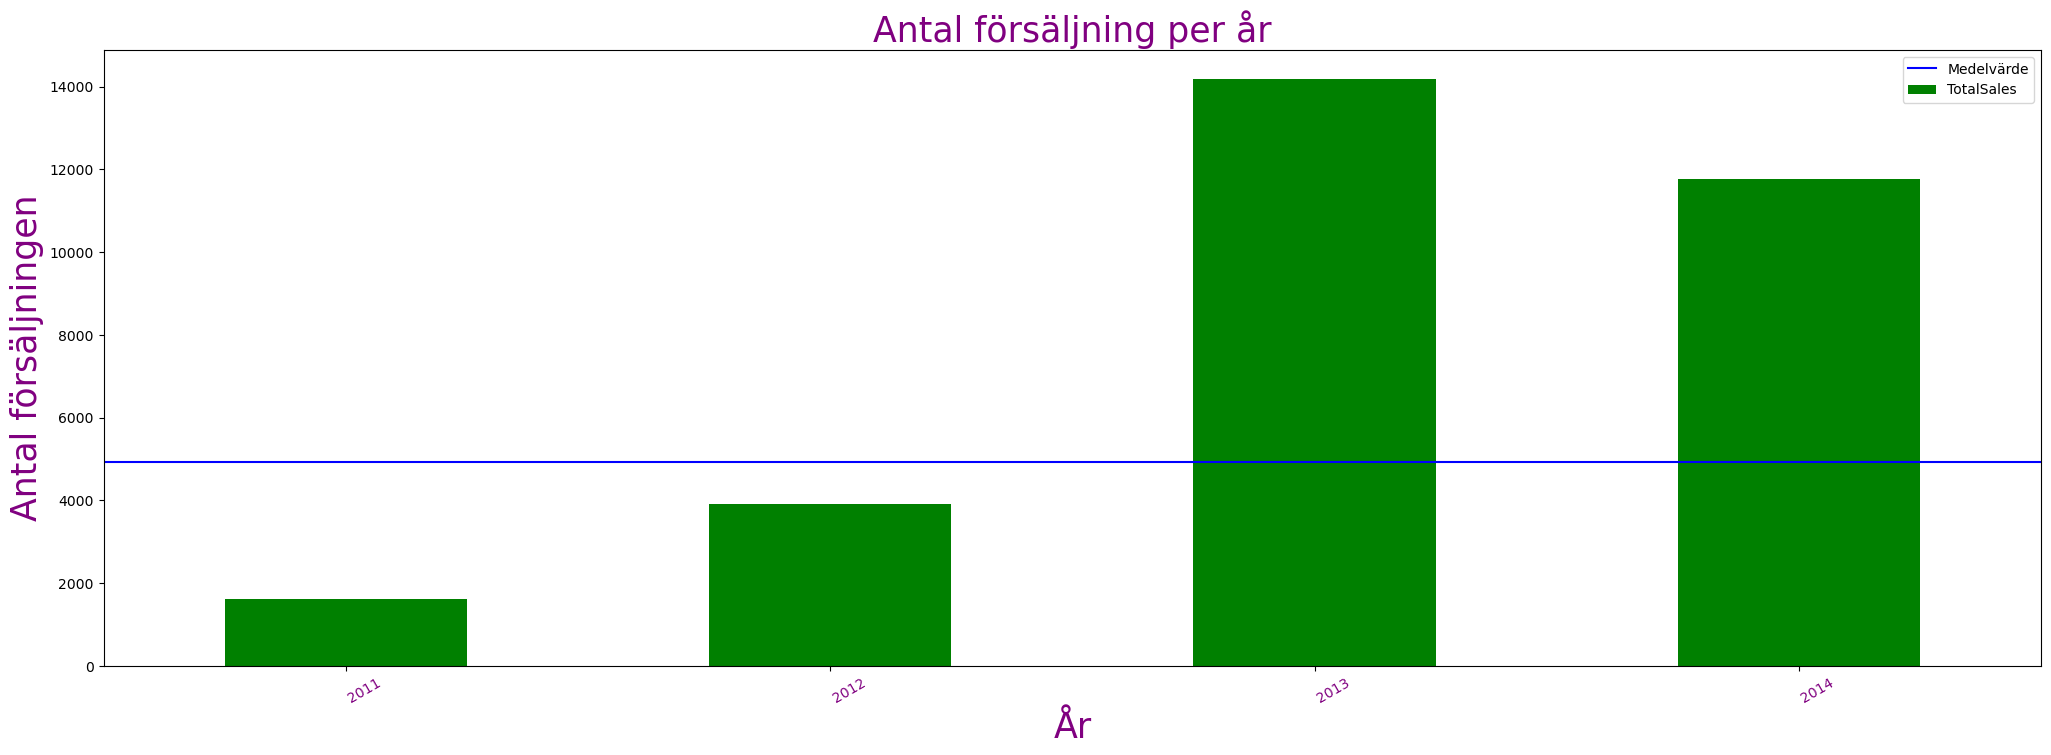

In [112]:
Sales_Data.plot(x="Year",y="TotalSales",kind="bar",figsize=(25,8), color="green")
plt.title("Antal försäljning per år", size=25, color="purple")
plt.axhline(Sales_mean, color="blue", label="Medelvärde")
plt.xlabel("År",size=25, color="purple")
plt.ylabel("Antal försäljningen",size=25, color="purple")
plt.xticks(rotation=30,ha="left",color="purple")
plt.legend()
plt.show()

                                        Resultat av Analys Jobb rollen
Analysen visar att Production tecnician är det vanligaste jobbet, följt av Sales Representative och Buyer, medan yrken som Marketing Specialist, Application Specialist, Janitor, Quality Assurance Technician, Scheduling Assistant, Marketing Assistant och Design Engineer har medelhögt behov, och yrken som Accounts Receivable Specialist, Production Supervisor och Stocker har lägre efterfrågan.


                                        Resultat av Analys försäljningen
Medelvärde:
Analysen visar att Genomsnitt medelvärdet av försäljningen per år är 4939,38. Detta ger en tydlig begrepp över åren.

Standardavvikelse för år:
Standardavvikelsen är 1,29, vilket indikerar att variationen i försäljning mellan åren är mycket liten, vilket tyder på stabilitet i försäljningsprestationen.

Total försäljning:
Den totala försäljningen under hela perioden uppgår till 6051,13, vilket ger en översikt av det ackumulerade resultatet.

Konfidensintervall:

För årsmedelvärdet är konfidensintervallet 4937,32–4941,43, vilket indikerar en mycket  säkerhetsmarginal för genomsnittliga försäljningsvärden.
För den totala försäljningen är konfidensintervallet bredare, från -4689,32 till 14568,07, vilket antyder större osäkerhet i de totala försäljningsvärdena på grund av större variabilitet i datan eller modellen.

                                           Executive Summary
Production  tecnician och sales representive är det mest viktigt jobb rollar på företaget. Å andra sidan Production supervisor och stocker har lägre efterfrågan.  och andra rollar av samtliga jobb rollar är medel efterfrågan på företaget.

Företaget har en stabil försäljningsnivå med ett genomsnitt på 4939 kr och standard avikelse ligger på 1,29. Detta indikerar att variationen i försäljning mellan åren är mycket liten. Dessutom är konfidensintervallet 4937,32–4941,43 , vilket indikerar mycket säkerhet marginal  för försäljningvärden.

Försäljningen visar att företaget har stabil förmåga att hålla efterfrågan och tillväxt på framtiden.


                                        Resultat av Analys Jobb rollen
Analysen visar att Production tecnician är det vanligaste jobbet, följt av Sales Representative och Buyer, medan yrken som Marketing Specialist, Application Specialist, Janitor, Quality Assurance Technician, Scheduling Assistant, Marketing Assistant och Design Engineer har medelhögt behov, och yrken som Accounts Receivable Specialist, Production Supervisor och Stocker har lägre efterfrågan.


                                        Resultat av Analys försäljningen
Medelvärde:
Analysen visar att Genomsnitt medelvärdet av försäljningen per år är 4939,38. Detta ger en tydlig begrepp över åren.

Standardavvikelse för år:
Standardavvikelsen är 1,29, vilket indikerar att variationen i försäljning mellan åren är mycket liten, vilket tyder på stabilitet i försäljningsprestationen.

Total försäljning:
Den totala försäljningen under hela perioden uppgår till 6051,13, vilket ger en översikt av det ackumulerade resultatet.

Konfidensintervall:

För årsmedelvärdet är konfidensintervallet 4937,32–4941,43, vilket indikerar en mycket  säkerhetsmarginal för genomsnittliga försäljningsvärden.
För den totala försäljningen är konfidensintervallet bredare, från -4689,32 till 14568,07, vilket antyder större osäkerhet i de totala försäljningsvärdena på grund av större variabilitet i datan eller modellen.